In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('Body.csv')

In [5]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.50
3,1.55,55.84
4,1.57,58.00


In [6]:
df.tail()

,Height,Weight
26,1.81,62.00
27,1.70,65.90
28,1.79,80.65
29,1.80,71.00
30,1.81,74.50


In [7]:
df.shape

(31, 2)

In [8]:
df.dtypes

Height    float64
Weight    float64
dtype: object

In [11]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [13]:
df['Height'].head()

0    1.47
1    1.50
2    1.52
3    1.55
4    1.57
Name: Height, dtype: float64

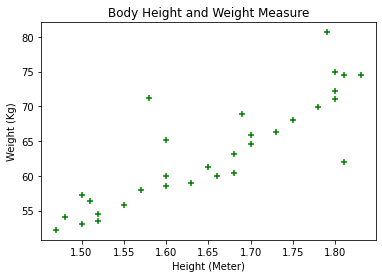

In [16]:
plt.title('Body Height and Weight Measure')
plt.xlabel('Height (Meter)')
plt.ylabel('Weight (Kg)')
plt.scatter(df['Height'], df['Weight'], color = 'green', marker = '+')

In [48]:
x = df[['Height']]
y = df['Weight']

In [20]:
x.head()

,Height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57


In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30)

In [50]:
xtrain.head()

,Height
0,1.47
20,1.50
29,1.80
28,1.79
4,1.57


In [51]:
ytrain.head()

0     52.21
20    57.30
29    71.00
28    80.65
4     58.00
Name: Weight, dtype: float64

In [52]:
xtest.shape

(10, 1)

In [25]:
xtrain.shape

(21, 1)

In [53]:
reg = LinearRegression()

In [54]:
reg.fit(xtrain, ytrain) # Training the model

LinearRegression()

In [55]:
xtest

,Height
8,1.68
5,1.60
10,1.73
30,1.81
21,1.60
2,1.52
9,1.70
18,1.51
15,1.68
14,1.83


In [58]:
ytest

8     63.11
5     58.57
10    66.28
30    74.50
21    60.00
2     54.50
9     64.50
18    56.43
15    60.45
14    74.46
Name: Weight, dtype: float64

In [72]:
reg.predict([[1.50]])

array([55.33201756])

In [73]:
reg.coef_

array([54.9928534])

In [74]:
reg.intercept_

-27.157262543337502

In [75]:
m = reg.coef_
c = reg.intercept_
x = 1.78
y = m*x + c
y

array([70.73001652])

In [76]:
prediction = reg.predict(xtest)
prediction

array([65.23073118, 60.8313029 , 67.98037385, 72.37980212, 60.8313029 ,
       56.43187463, 66.33058824, 55.8819461 , 65.23073118, 73.47965919])

In [77]:
mse = mean_squared_error(ytest, prediction)

In [65]:
mse

4.88885810306728

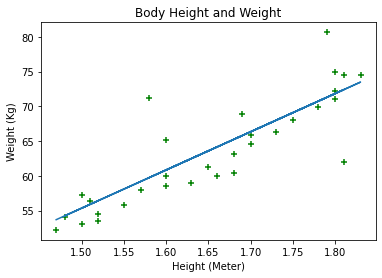

In [78]:
# Best Fit Line
plt.plot(df.Height, reg.predict(df[['Height']]))
plt.title('Body Height and Weight')
plt.xlabel('Height (Meter)')
plt.ylabel('Weight (Kg)')
plt.scatter(df['Height'], df['Weight'], color = 'green', marker = '+')

In [79]:
reg.score(xtest, ytest)

0.8853350802966861

In [68]:
# Save Trained Model
import joblib as jbl
jbl.dump(reg, 'Weight_Height_Trained_Data')

['Weight_Height_Trained_Data']

In [70]:
model = jbl.load('Weight_Height_Trained_Data')

In [80]:
model.predict([[1.50]])

array([55.33201756])